# problem statement
# Our task is to construct a forecasting model that can estimate the sales of each item at various grocery stores and supermarkets. With the help of historical sales data, we can train the model to ensure that stakeholders have a better understanding of managing and planning.
#To begin, we will utilize a variety of techniques such as data cleaning, preprocesses, exploratory data analysis and feature engineering. Following that, we will build machine learning models including Linear regression, Regularized linear regression, XGboost and Random forest.

#In the next phase, we will evaluate the models by comparing the outcomes using trustworthy performance metrics such as mean squared error. Finally, we will choose the most effective model which can be implemented to tackle this scenario.




# Hypothesis generation

# The likelihood of snack food purchases increases when a cinema is situated close to the store. This provides an opportunity to enhance our sales and marketing strategies for different products and store areas.


# import libraries


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


# loading packages and data


In [2]:

tr = pd.read_csv("/content/Train.csv")
tr.head()



ts = pd.read_csv("/content/Test.csv")
ts.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [3]:

print (tr.shape)
print (ts.shape)



(8523, 12)
(5681, 11)


In [4]:

tr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# preprocessing


In [5]:
tr.describe()

ts.describe()



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Text(0, 0.5, 'Outlet_Establishment_Year')

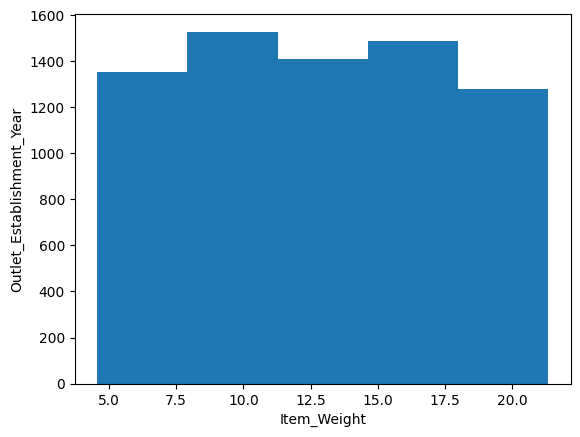

In [6]:

fig=plt.figure()
k=fig.add_subplot(1,1,1)
k.hist(tr["Item_Weight"], bins=5)
plt.xlabel('Item_Weight')
plt.ylabel('Outlet_Establishment_Year')


In [7]:
tr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Exploratory Data Analysis
  Missing Value Treatment



In [8]:


print(tr.isnull().sum())
print(ts.isnull().sum())


tr.fillna(tr.mean(), inplace=True)


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


<ipython-input-8-10deceecda4d>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  tr.fillna(tr.mean(), inplace=True)


In [9]:
# For training dataframe
mode_tr = tr["Outlet_Size"].mode()[0]
tr['Outlet_Size'].fillna(value=mode_tr, inplace=True)


In [10]:

# Checking missing values
print("Training Data - Missing Values in 'Outlet_Size' column: ", tr.isnull().sum())


Training Data - Missing Values in 'Outlet_Size' column:  Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

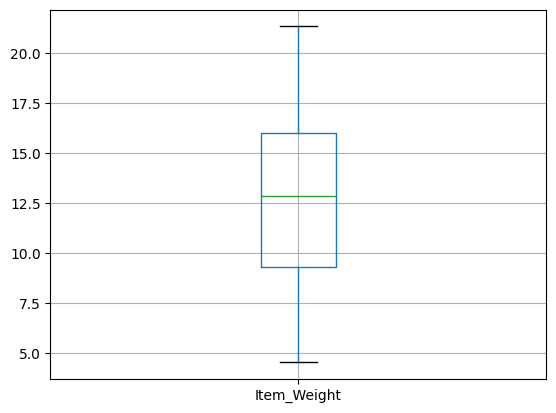

In [11]:

tr.boxplot(column=["Item_Weight"])
plt.show


In [12]:

tr['Item_Weight'] = (tr['Item_Weight'] - tr['Item_Weight'].min()) / (tr['Item_Weight'].max() - tr['Item_Weight'].min())
tr['Item_Visibility'] = (tr['Item_Visibility'] - tr['Item_Visibility'].min()) / (tr['Item_Visibility'].max() - tr['Item_Visibility'].min())
tr['Item_MRP'] = (tr['Item_MRP'] - tr['Item_MRP'].min()) / (tr['Item_MRP'].max() - tr['Item_MRP'].min())



In [13]:

tr.describe()



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.494352,0.201382,0.465635,1997.831867,2181.288914
std,0.251630,0.157123,0.264327,8.371760,1706.499616
min,0.000000,0.000000,0.000000,1985.000000,33.290000
25%,0.283120,0.082187,0.265437,1987.000000,834.247400
50%,0.494352,0.164228,0.474209,1999.000000,1794.331000
75%,0.681453,0.288026,0.655156,2004.000000,3101.296400
max,1.000000,1.000000,1.000000,2009.000000,13086.964800


In [14]:

drop=['Outlet_Identifier','Item_Identifier']
tr.drop(drop, axis=1, inplace= True)
tr


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.282525,Low Fat,0.048866,Dairy,0.927507,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,0.081274,Regular,0.058705,Soft Drinks,0.072068,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,0.770765,Low Fat,0.051037,Meat,0.468288,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,0.871986,Regular,0.000000,Fruits and Vegetables,0.640093,1998,Medium,Tier 3,Grocery Store,732.3800
4,0.260494,Low Fat,0.000000,Household,0.095805,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,Low Fat,0.172914,Snack Foods,0.777729,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,0.227746,Regular,0.143069,Baking Goods,0.326263,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,0.359929,Low Fat,0.107148,Health and Hygiene,0.228492,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,0.158083,Regular,0.442219,Snack Foods,0.304939,2009,Medium,Tier 3,Supermarket Type2,1845.5976



# split data to categorical and numerical


In [15]:

# List of all the numeric and categorical columns respectively
num_cols = tr.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = tr.select_dtypes(include=['object']).columns.tolist()

# Separate dataframes for numeric and categorical columns
BM_num = tr[num_cols]
BM_cat = tr[cat_cols]

# Print value counts for all categorical columns except the first one
for col in cat_cols[1:]:
    print(BM_cat[col].value_counts())



Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [16]:


# replace LF,reg low fat to Low Fat , Regular
tr["Item_Fat_Content"].replace(['LF','low fat' , 'reg'],
  ['Low Fat', "Low Fat", "Regular"],inplace = True )


ts["Item_Fat_Content"].replace(['LF','low fat' , 'reg'],
  ['Low Fat', "Low Fat", "Regular"],inplace = True )
tr.Item_Fat_Content.value_counts()



Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [17]:

tr.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.282525,Low Fat,0.048866,Dairy,0.927507,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,0.081274,Regular,0.058705,Soft Drinks,0.072068,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,0.770765,Low Fat,0.051037,Meat,0.468288,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,0.871986,Regular,0.000000,Fruits and Vegetables,0.640093,1998,Medium,Tier 3,Grocery Store,732.3800
4,0.260494,Low Fat,0.000000,Household,0.095805,1987,High,Tier 3,Supermarket Type1,994.7052



#Univariate Analysis



categorical columns


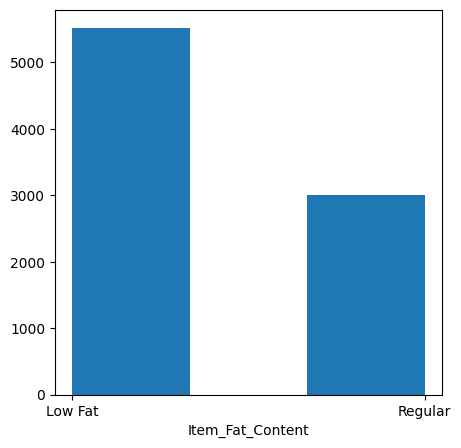

In [18]:

plt.figure(figsize=(5,5))
plt.hist(tr["Item_Fat_Content"], bins=3)
plt.xlabel('Item_Fat_Content')
plt.show()


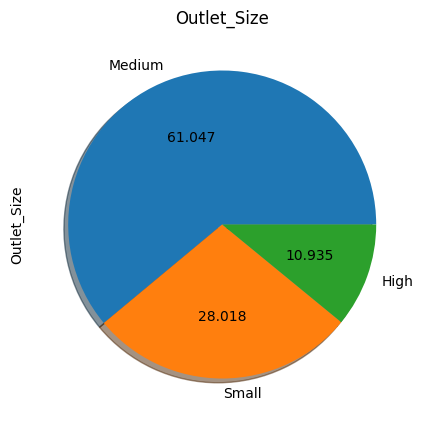

In [19]:

plt.figure(figsize=(5,5))
plt.title('Outlet_Size')
tr['Outlet_Size'].value_counts().plot(kind='pie' ,autopct="%.3f" , shadow=True)
plt.show()


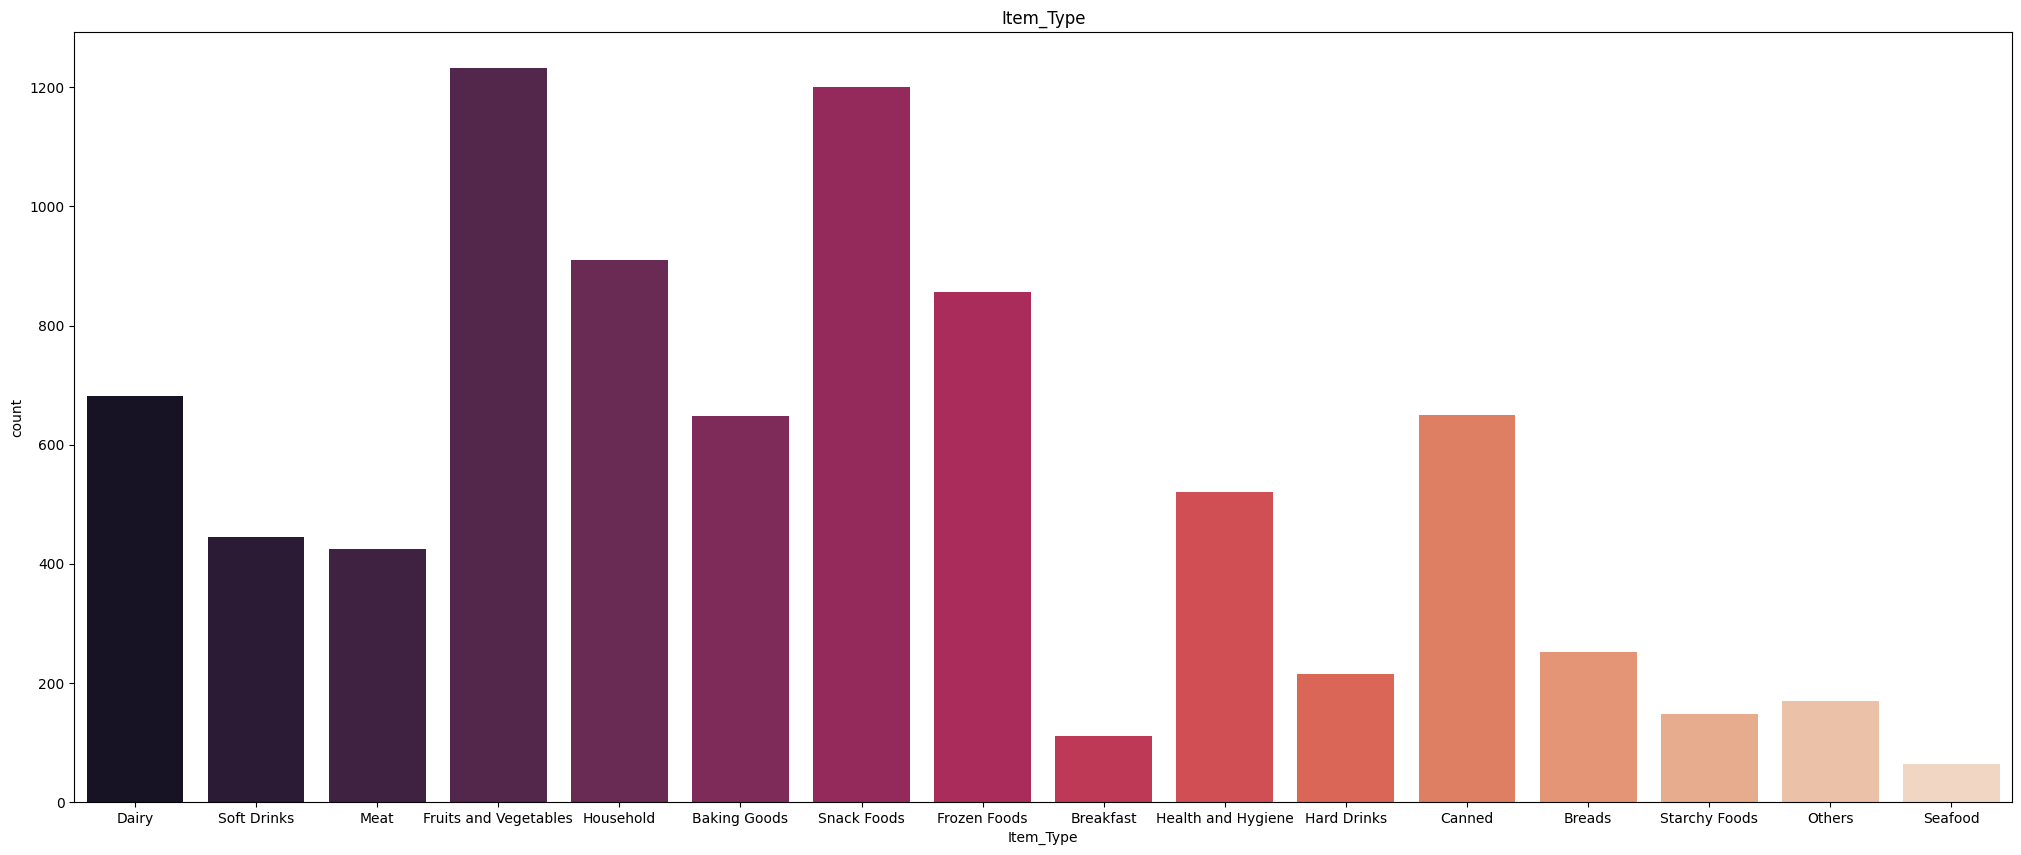

In [20]:

plt.figure(figsize=(25,10))
plt.title('Item_Type')
sns.countplot(x="Item_Type" , data=tr , palette="rocket")
plt.xlabel("Item_Type")
plt.show()



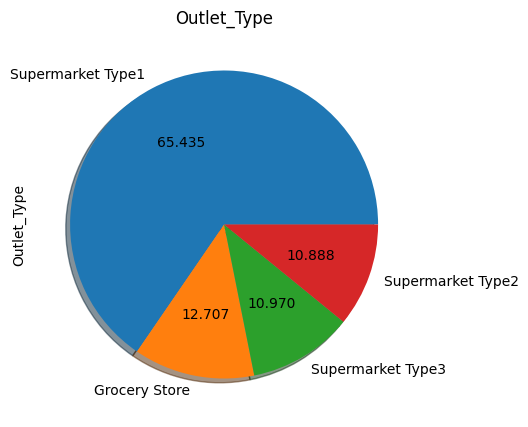

In [21]:

plt.figure(figsize=(5,5))
plt.title('Outlet_Type')
tr['Outlet_Type'].value_counts().plot(kind='pie' ,autopct="%.3f" , shadow=True)
plt.show()


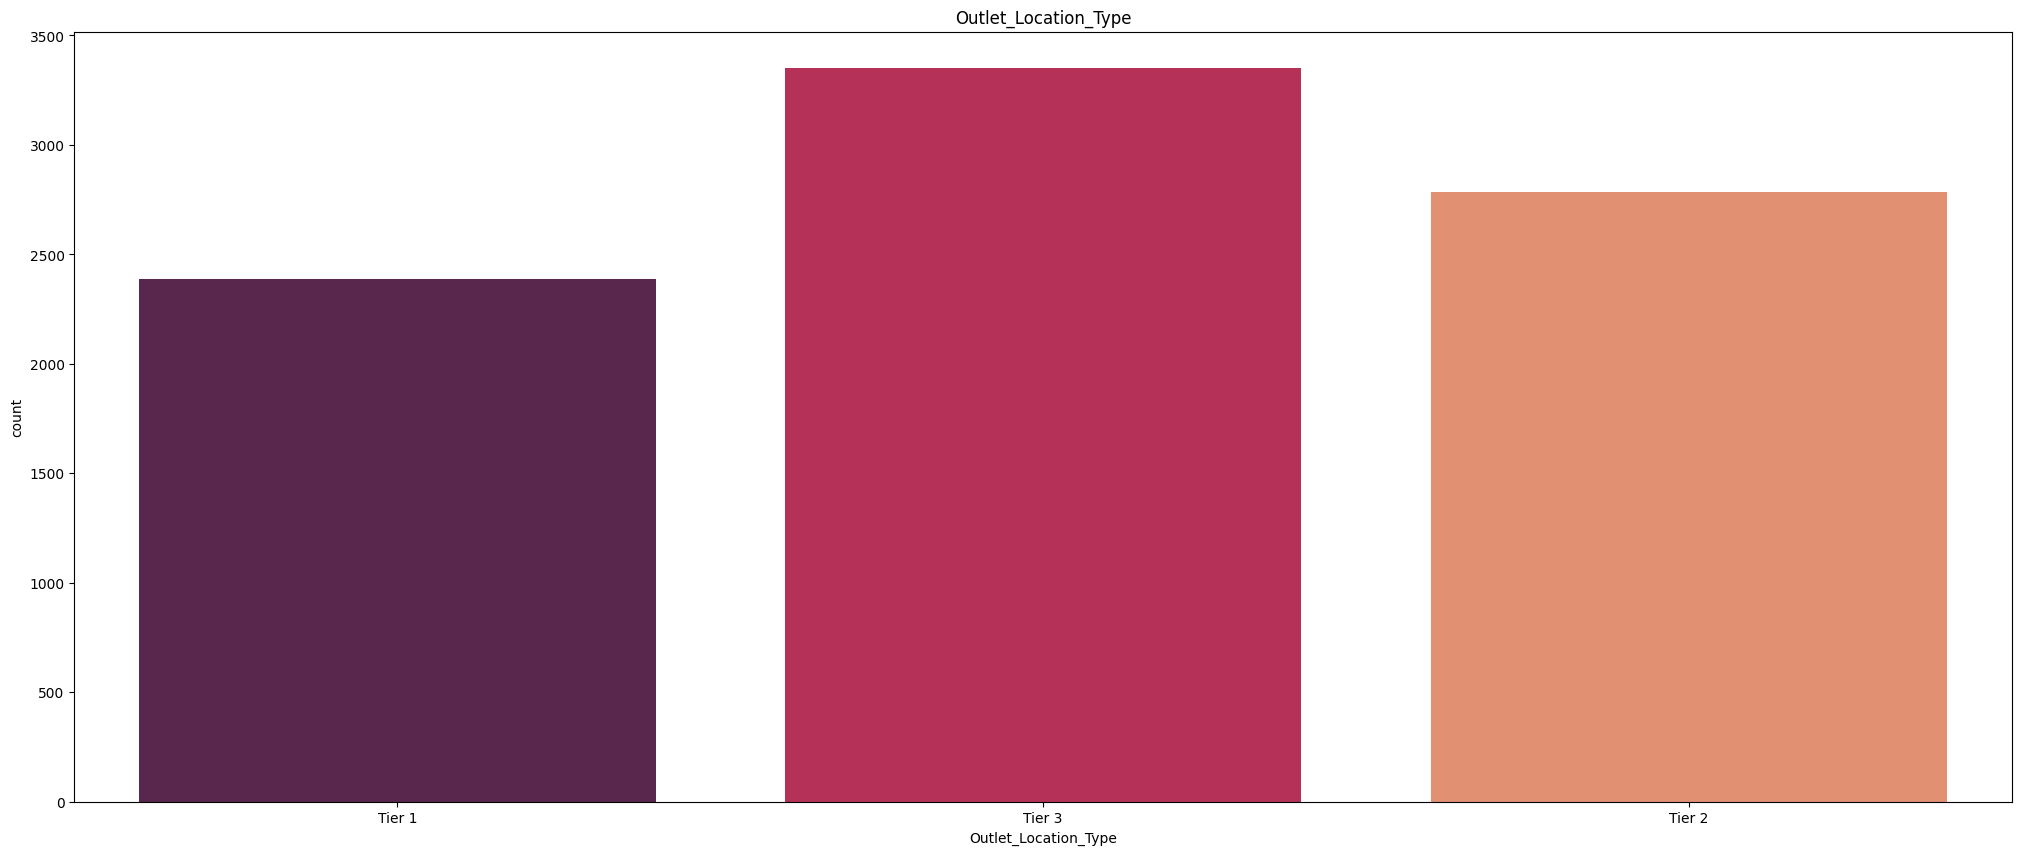

In [22]:

plt.figure(figsize=(25,10))
plt.title('Outlet_Location_Type')
sns.countplot(x="Outlet_Location_Type" , data=tr , palette="rocket")
plt.xlabel("Outlet_Location_Type")
plt.show()



numerical columns


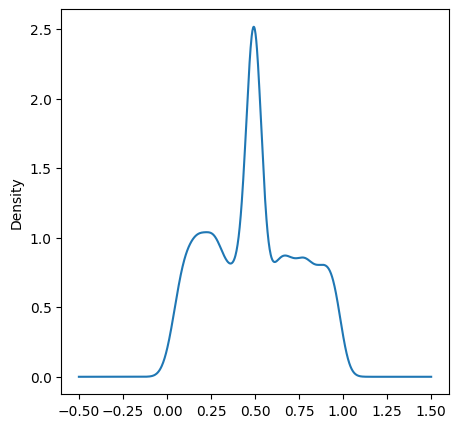

In [23]:

plt.figure(figsize=(5,5))
tr['Item_Weight'].plot(kind='density')
plt.show()

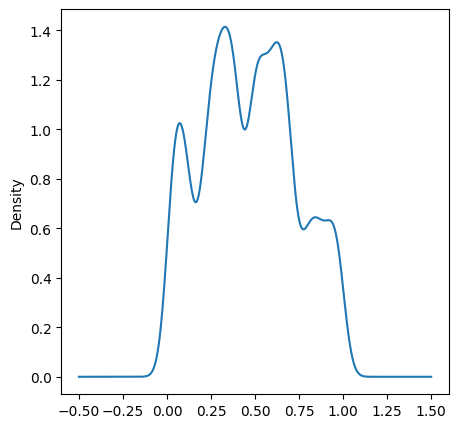

In [24]:
plt.figure(figsize=(5,5))
tr['Item_MRP'].plot(kind='density')
plt.show()

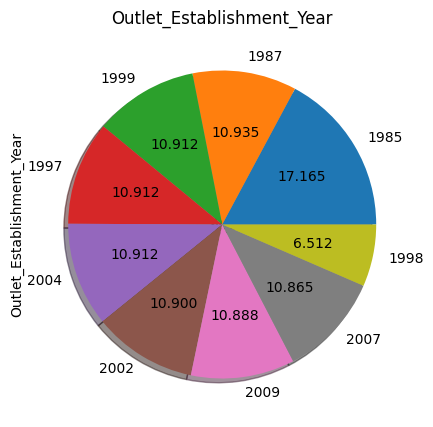

In [25]:

plt.figure(figsize=(5,5))
plt.title('Outlet_Establishment_Year')
tr['Outlet_Establishment_Year'].value_counts().plot(kind='pie' ,autopct="%.3f" , shadow=True)
plt.show()




Bivariate Analysis



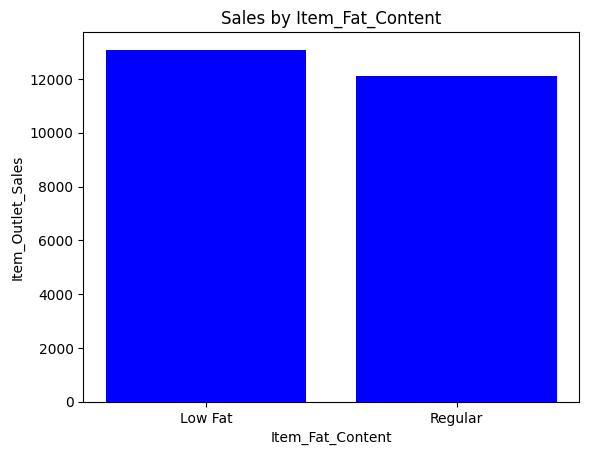

In [26]:

plt.bar(tr['Item_Fat_Content'], tr['Item_Outlet_Sales'], color='b')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Sales by Item_Fat_Content')
plt.show()


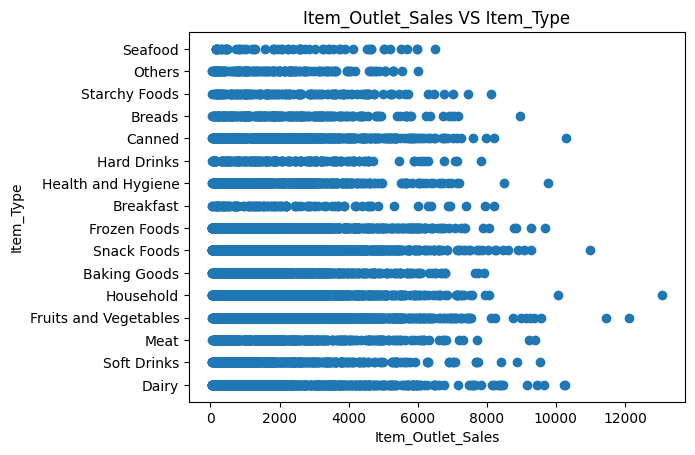

In [27]:

plt.title('Item_Outlet_Sales VS Item_Type')
plt.scatter(tr['Item_Outlet_Sales'], tr['Item_Type'])
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Item_Type")
plt.show()


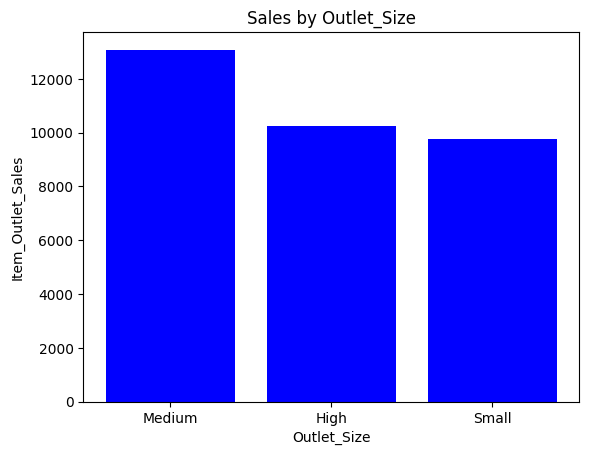

In [28]:

plt.bar(tr['Outlet_Size'], tr['Item_Outlet_Sales'], color='b')
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title('Sales by Outlet_Size')
plt.show()


In [29]:

import pandas as pd

# create a list of columns to be encoded
columns_to_encode = ['Item_Fat_Content', 'Outlet_Type']

# use pandas get_dummies method to one-hot encode them
encoded_columns = pd.get_dummies(tr[columns_to_encode])

# concatenate the original dataframe with the encoded columns
tr = pd.concat([tr, encoded_columns], axis=1)

# drop the original columns that were encoded
tr = tr.drop(columns_to_encode, axis=1)



tr

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,Dairy,0.927507,1999,Medium,Tier 1,3735.1380,1,0,0,1,0,0
1,0.081274,0.058705,Soft Drinks,0.072068,2009,Medium,Tier 3,443.4228,0,1,0,0,1,0
2,0.770765,0.051037,Meat,0.468288,1999,Medium,Tier 1,2097.2700,1,0,0,1,0,0
3,0.871986,0.000000,Fruits and Vegetables,0.640093,1998,Medium,Tier 3,732.3800,0,1,1,0,0,0
4,0.260494,0.000000,Household,0.095805,1987,High,Tier 3,994.7052,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.172914,Snack Foods,0.777729,1987,High,Tier 3,2778.3834,1,0,0,1,0,0
8519,0.227746,0.143069,Baking Goods,0.326263,2002,Medium,Tier 2,549.2850,0,1,0,1,0,0
8520,0.359929,0.107148,Health and Hygiene,0.228492,2004,Small,Tier 2,1193.1136,1,0,0,1,0,0
8521,0.158083,0.442219,Snack Foods,0.304939,2009,Medium,Tier 3,1845.5976,0,1,0,0,1,0


In [30]:

from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Outlet_Size', 'Outlet_Location_Type', 'Item_Type']

for col in columns_to_encode:
    label_encoder = LabelEncoder()
    tr[col] = label_encoder.fit_transform(tr[col])



tr



,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,4,0.927507,1999,1,0,3735.1380,1,0,0,1,0,0
1,0.081274,0.058705,14,0.072068,2009,1,2,443.4228,0,1,0,0,1,0
2,0.770765,0.051037,10,0.468288,1999,1,0,2097.2700,1,0,0,1,0,0
3,0.871986,0.000000,6,0.640093,1998,1,2,732.3800,0,1,1,0,0,0
4,0.260494,0.000000,9,0.095805,1987,0,2,994.7052,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.172914,13,0.777729,1987,0,2,2778.3834,1,0,0,1,0,0
8519,0.227746,0.143069,0,0.326263,2002,1,1,549.2850,0,1,0,1,0,0
8520,0.359929,0.107148,8,0.228492,2004,2,1,1193.1136,1,0,0,1,0,0
8521,0.158083,0.442219,13,0.304939,2009,1,2,1845.5976,0,1,0,0,1,0


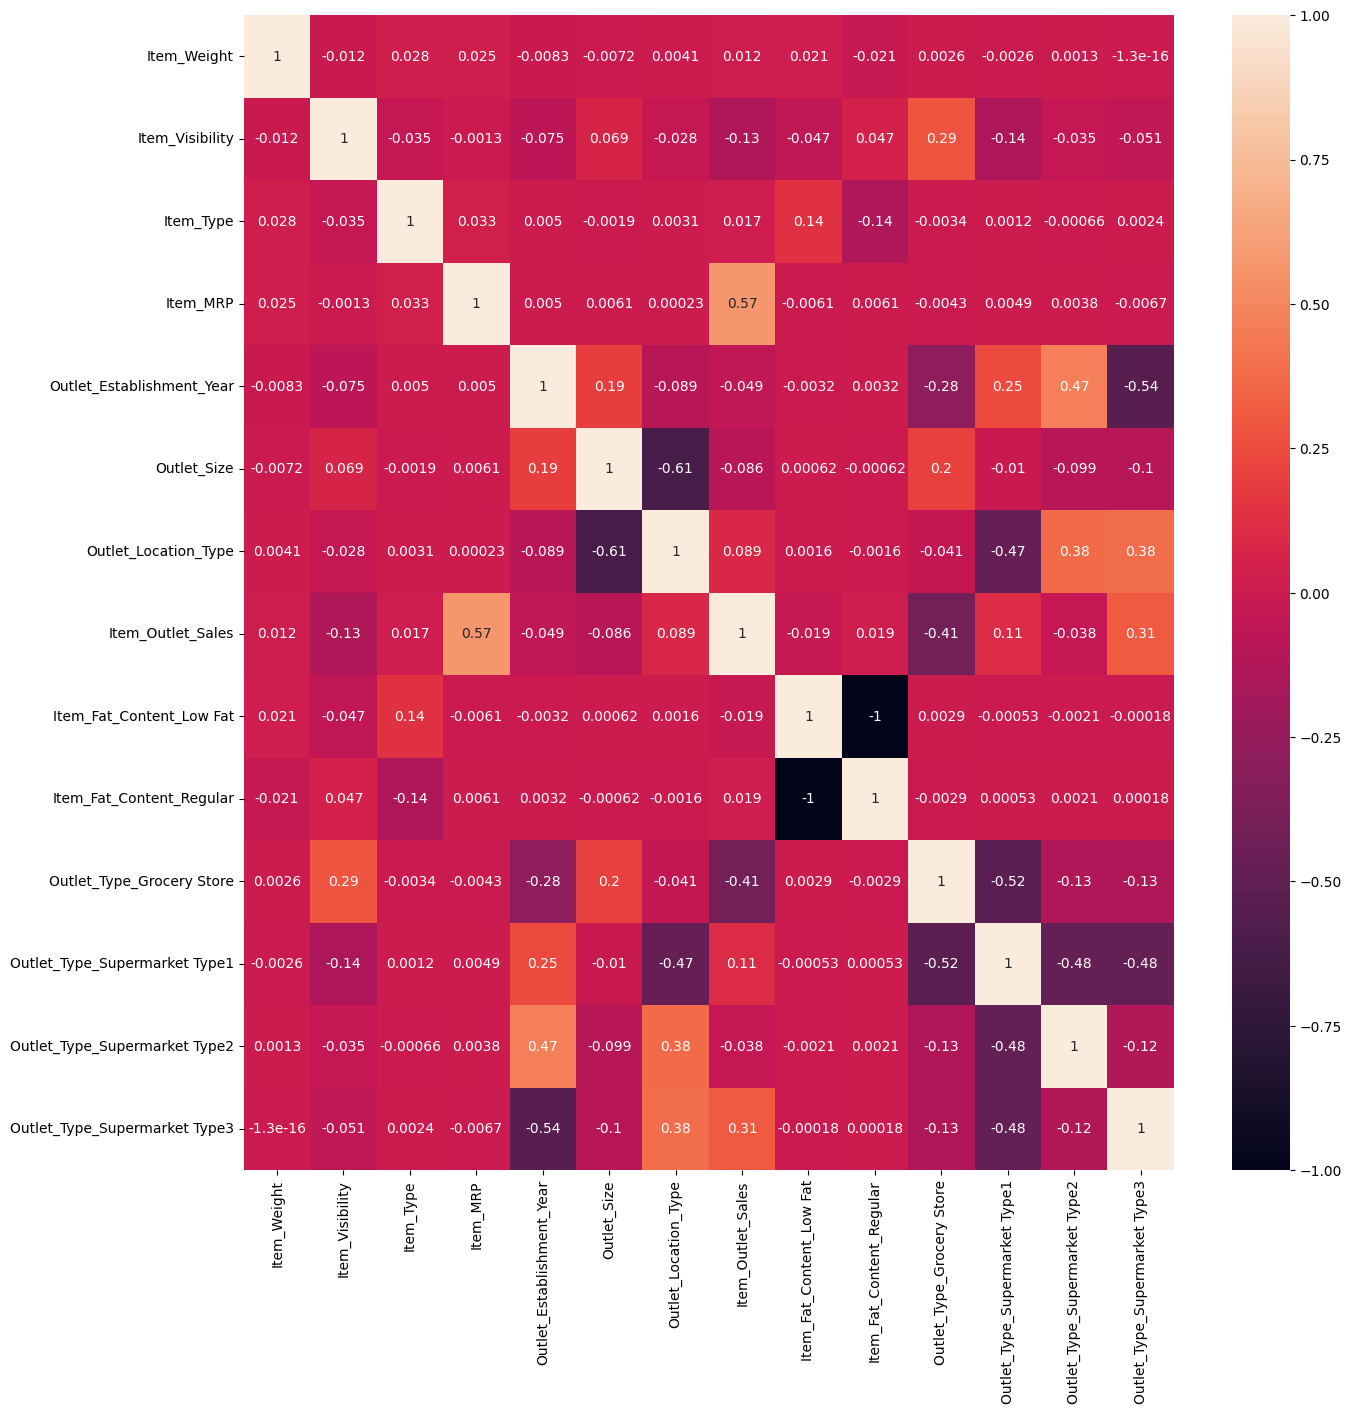

In [77]:

plt.figure(figsize=(15,15))
sns.heatmap(tr.corr() , cmap='rocket' ,annot=True)
plt.show()


In [32]:

y=tr['Item_Outlet_Sales']
x=tr.drop( ['Item_Outlet_Sales'], axis=1)


In [33]:

x_train1, x_test1, y_train1 , y_test1=train_test_split(x,y,test_size=0.2 ,random_state=0)
print(x_train1.shape)
print(x_test1.shape)
print(y_test1.shape)
print(y_train1.shape)


(6818, 13)
(1705, 13)
(1705,)
(6818,)


In [82]:

linear_model1 = LinearRegression()
linear_model1.fit( x_train1 , y_train1 )

LinearRegression()

In [72]:

# Predict values based on the trained model
y_pred4 = linear_model1.predict(x_test1)

print(len(y_pred4))


1705


In [73]:

mse1=mean_squared_error(y_test1 ,y_pred4 )
print(mse1)
print(r2_score(y_test1 ,y_pred4 ))
print(np.sqrt(mse1))


1278110.7977108972
0.5633166476548697
1130.535624255555


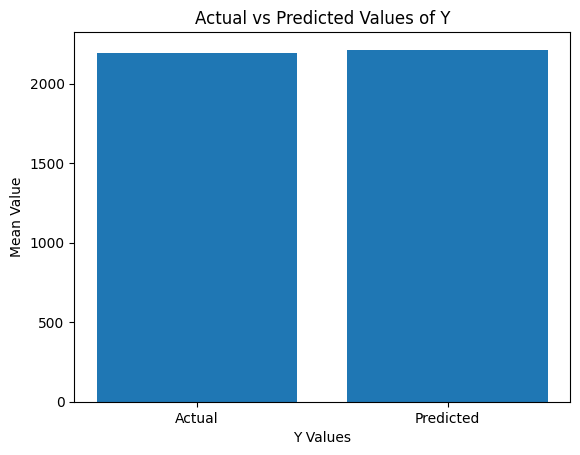

In [38]:

x = ['Actual', 'Predicted']
heights = [y_test1.mean(), y_pred1.mean()]

plt.bar(x, heights)
plt.title('Actual vs Predicted Values of Y')
plt.xlabel('Y Values')
plt.ylabel('Mean Value')
plt.show()


In [83]:

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.5)
ridge.fit(x_train1, y_train1)


Ridge(alpha=0.5)

In [66]:

y_pred2 = ridge.predict(x_test1)

print(len(y_pred2))



1705


In [69]:

ridgemse= mean_squared_error(y_test1 ,y_pred2)
print(ridgemse)
print(r2_score(y_test1 ,y_pred2 ))
print(np.sqrt(ridgemse))


1278123.4063042863
0.5633123397632225
1130.5412006222004


In [43]:

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)


In [85]:

rf.fit(x_train1, y_train1)



RandomForestRegressor(max_depth=10, random_state=42)

In [46]:

y_pred = rf.predict(x_test1)
print(len(y_pred))


1705


In [70]:

mse2 = mean_squared_error(y_test1, y_pred)
print(f"Mean Squared Error: {mse2}")

print(r2_score(y_test1 ,y_pred ))
print(np.sqrt(mse2))


Mean Squared Error: 2818009.303290914
0.037190084220544706
1678.6927364145333


In [49]:

!pip install xgboost


In [50]:

import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                          colsample_bytree = 0.3,
                          learning_rate = 0.1,
                          max_depth = 5,
                          alpha = 10,
                          n_estimators = 10)


In [87]:

xg_reg.fit(x_train1,y_train1)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [52]:
y_pred = xg_reg.predict(x_test1)


In [71]:
mse3 = mean_squared_error(y_test1, y_pred)
print("MSE: %f" % (mse3))

print(r2_score(y_test1 ,y_pred ))
print(np.sqrt(mse3))


MSE: 2818009.303291
0.037190084220544706
1678.6927364145333


In [55]:
import pickle

In [88]:
with open("data.pkl", "wb") as file:
    pickle.dump(linear_model1, file)


#summary

This code is about data preprocessing and prediction of sales of various items from a dataset.
It imports necessary libraries for data processing and plotting, reads and loads the data from train and test CSV files, and preprocesses the data by removing outliers, handling missing values, and encoding categorical columns. It then trains the dataset using Linear Regression, Ridge, Random Forest, and XGBoost regression models, and computes the mean squared error, root mean squared error, and r-squared score for each.
Finally, it plots the actual vs predicted values of Y and shows the mean squared errors for each regression model.